# Final Project

**Due December 7th, 2022 (Wednesday)**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

## Start of the Project Here

In [1]:
library('tidyverse')
library("jsonlite")
library("lubridate")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘jsonlite’


The following object is masked from ‘package:purrr’:

    flatten



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
nfl_data = read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-04/standings.csv',
         col_types = cols())

nfl_data |> head()

team,team_name,year,wins,loss,points_for,points_against,points_differential,margin_of_victory,strength_of_schedule,simple_rating,offensive_ranking,defensive_ranking,playoffs,sb_winner
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Miami,Dolphins,2000,11,5,323,226,97,6.1,1.0,7.1,0.0,7.1,Playoffs,No Superbowl
Indianapolis,Colts,2000,10,6,429,326,103,6.4,1.5,7.9,7.1,0.8,Playoffs,No Superbowl
New York,Jets,2000,9,7,321,321,0,0.0,3.5,3.5,1.4,2.2,No Playoffs,No Superbowl
Buffalo,Bills,2000,8,8,315,350,-35,-2.2,2.2,0.0,0.5,-0.5,No Playoffs,No Superbowl
New England,Patriots,2000,5,11,276,338,-62,-3.9,1.4,-2.5,-2.7,0.2,No Playoffs,No Superbowl
Tennessee,Titans,2000,13,3,346,191,155,9.7,-1.3,8.3,1.5,6.8,Playoffs,No Superbowl


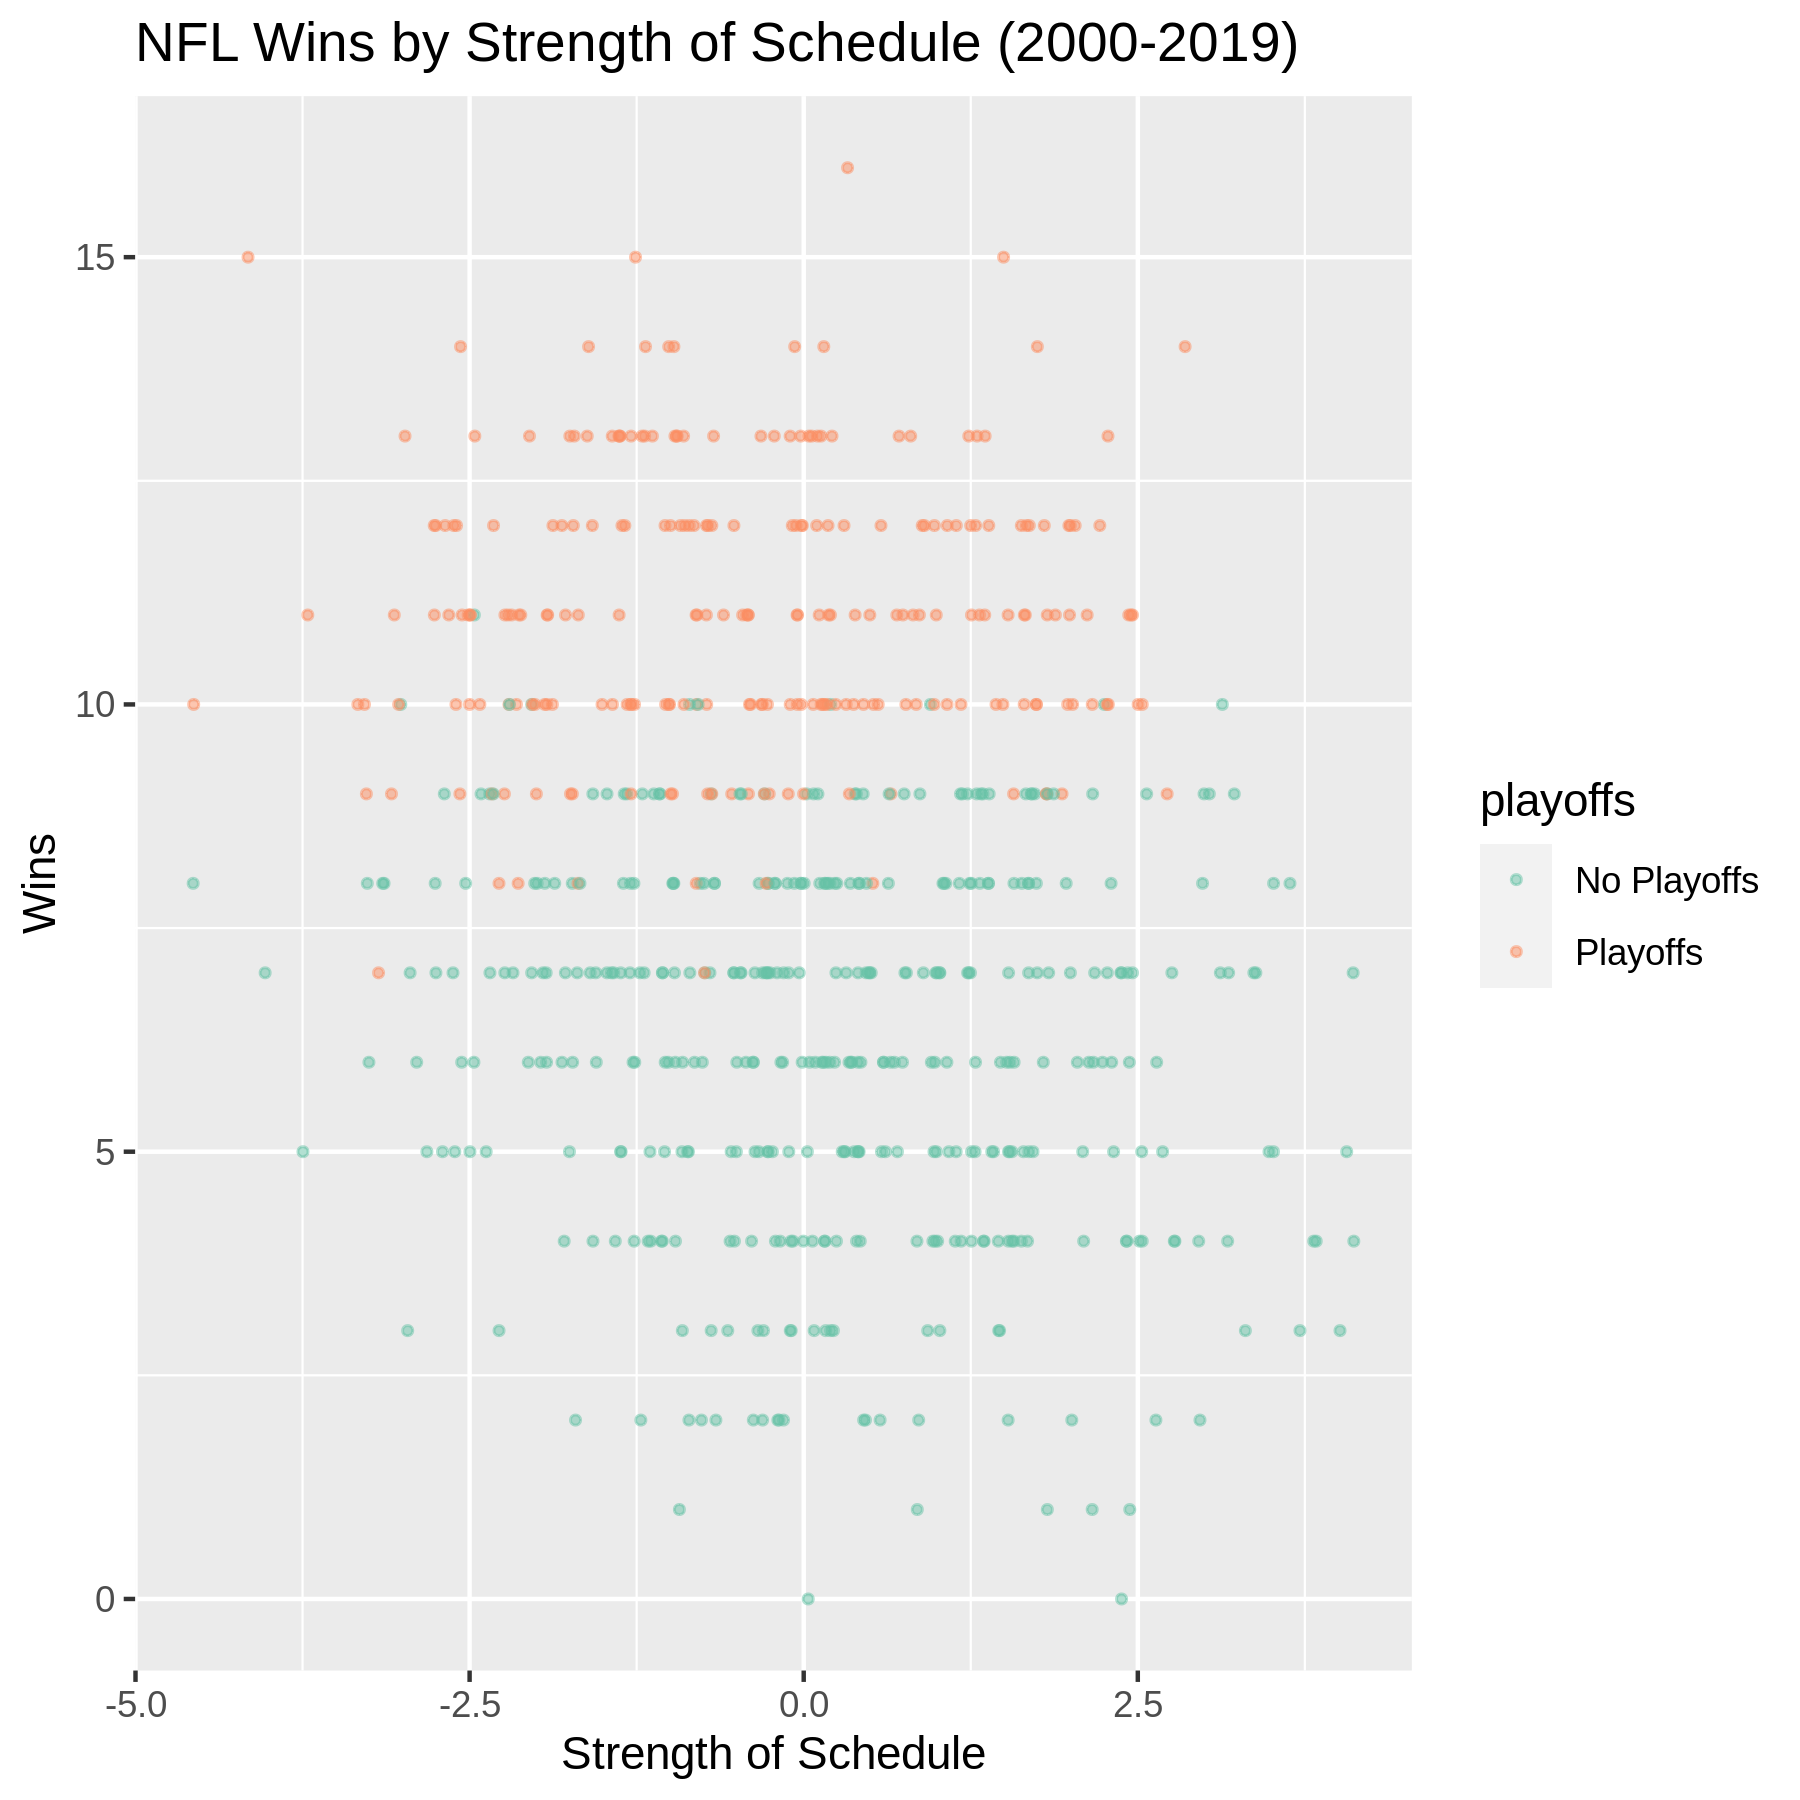

In [10]:
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 6)
p = ggplot(nfl_data, aes(x = strength_of_schedule, y = wins, color = playoffs)) + 
    geom_point (na.rm = T , position = position_jitter(h = 0, w = 0.3), size = 0.8, alpha = 0.5) +
    scale_color_brewer(type = "qual", palette = "Set2") +
    labs(title = 'NFL Wins by Strength of Schedule (2000-2019)', x = 'Strength of Schedule', y= 'Wins') 


p

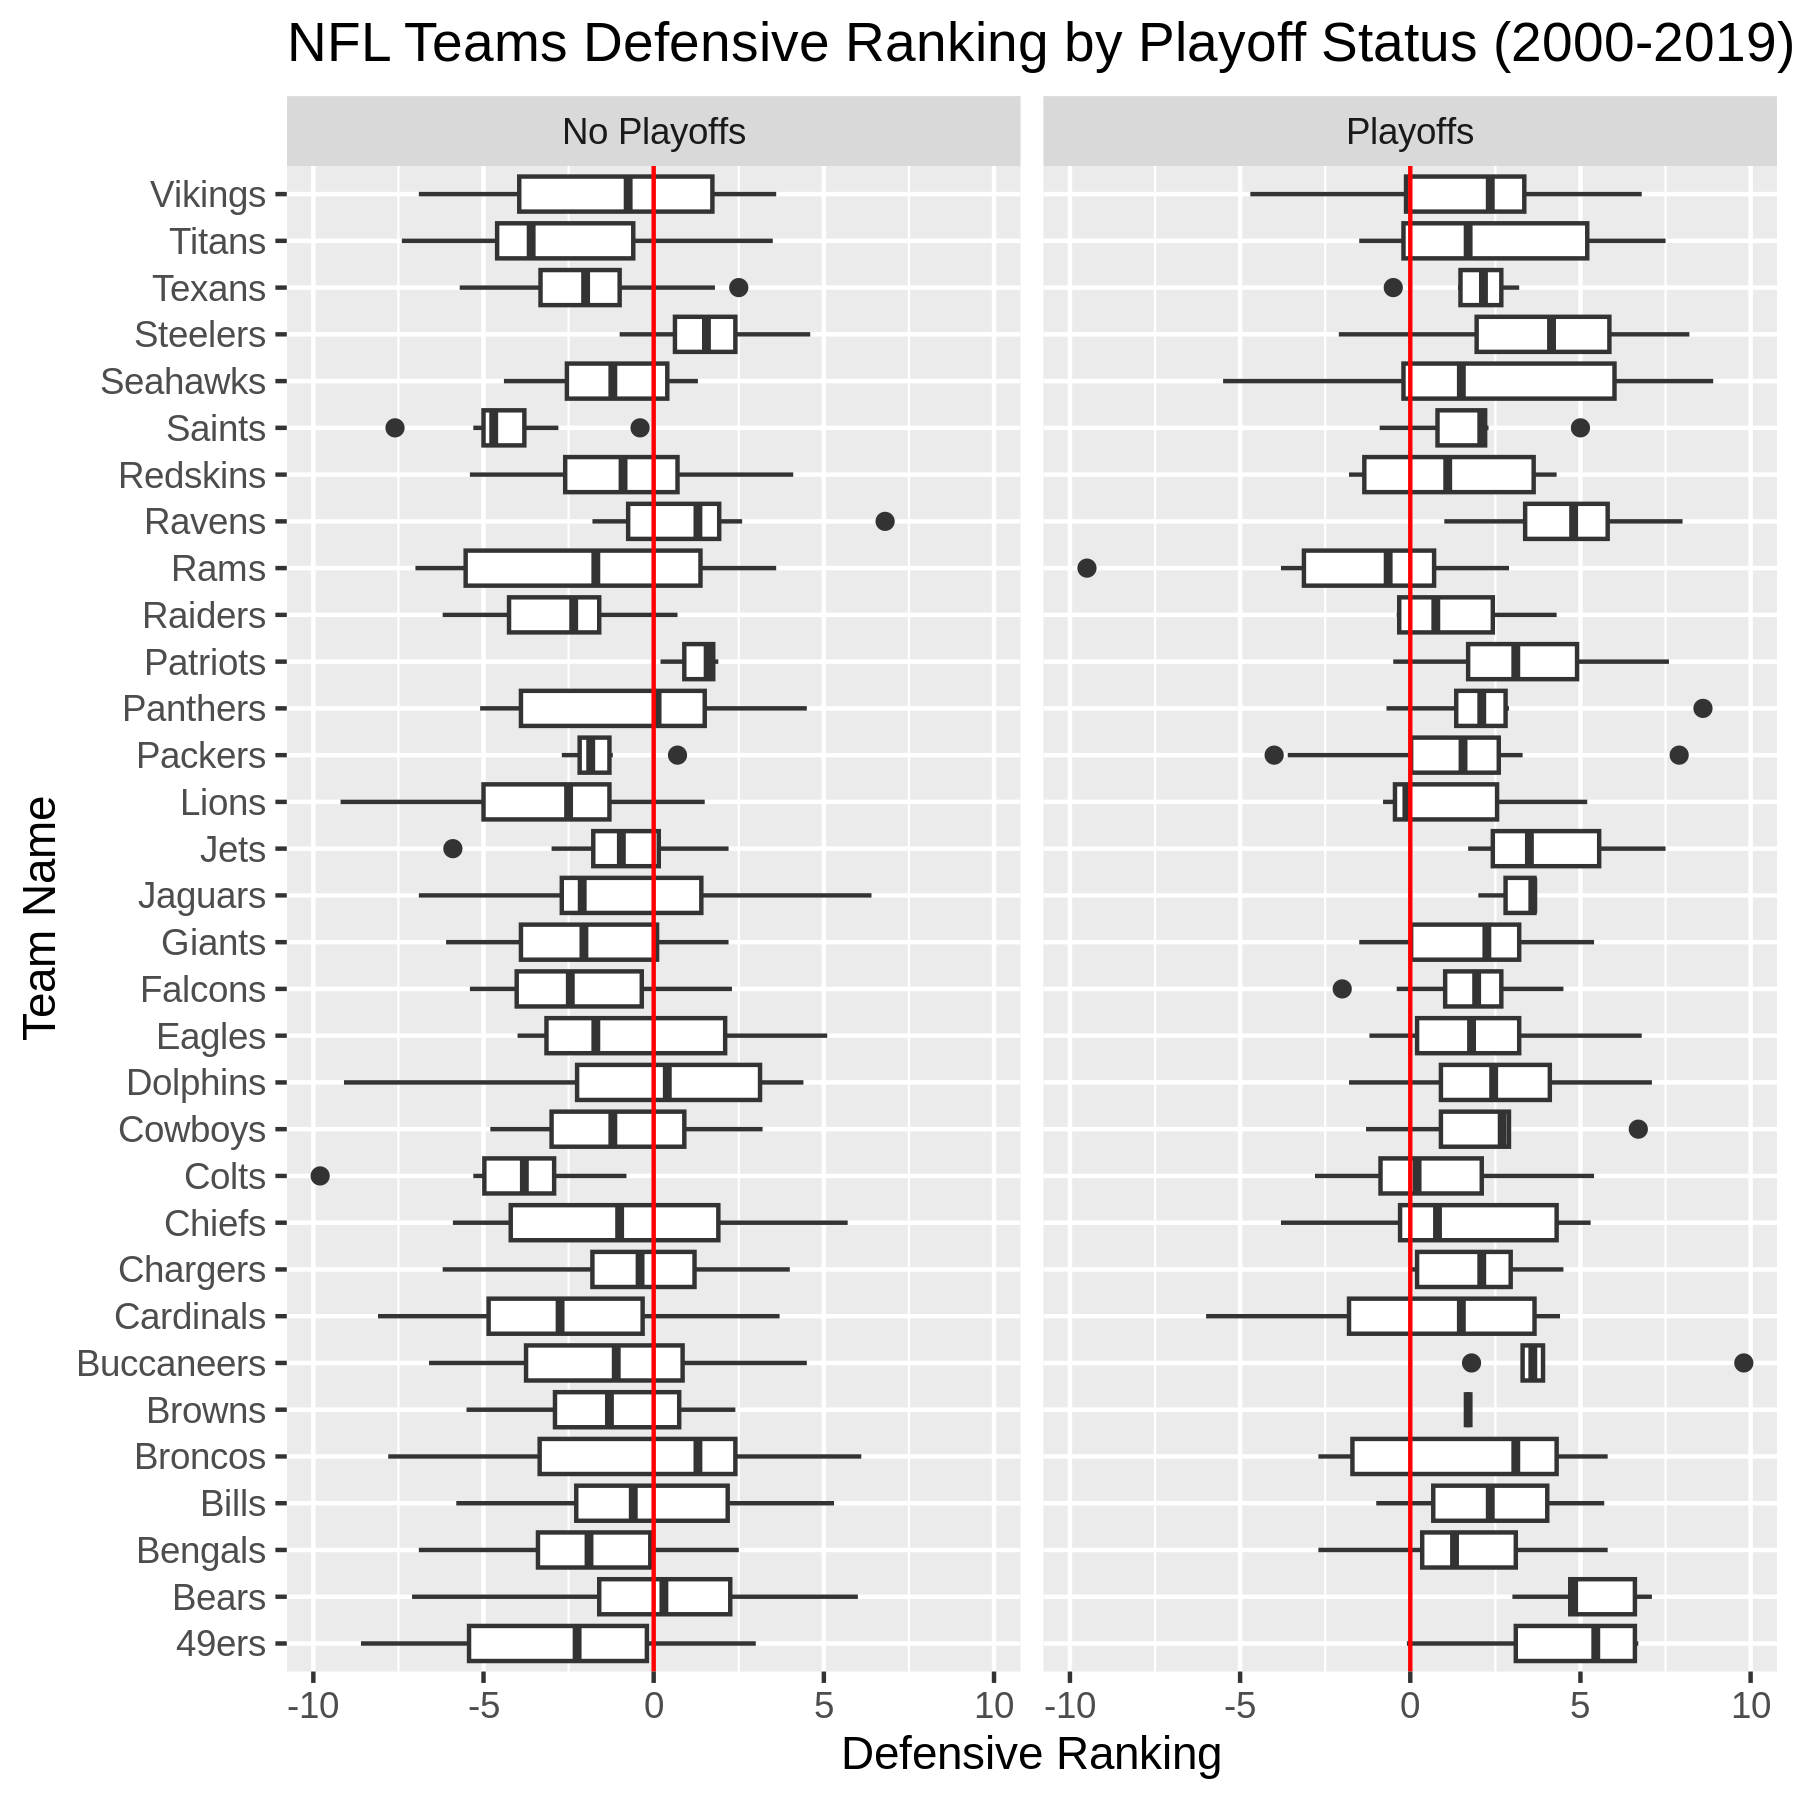

In [5]:
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 6)
p1 = ggplot(nfl_data, aes(x = defensive_ranking , y = team_name)) + 
    geom_boxplot() + 
    facet_wrap (~playoffs) +
    geom_vline(xintercept=0, color='red') +
    labs(title = 'NFL Teams Defensive Ranking by Playoff Status (2000-2019)', x = 'Defensive Ranking', y= 'Team Name') 

p1

        


In [3]:
panthers = nfl_data |> 
    filter (team_name == 'Panthers') 
panthers |> head(20)

team,team_name,year,wins,loss,points_for,points_against,points_differential,margin_of_victory,strength_of_schedule,simple_rating,offensive_ranking,defensive_ranking,playoffs,sb_winner
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Carolina,Panthers,2000,7,9,310,310,0,0.0,-1.1,-1.1,-3.6,2.5,No Playoffs,No Superbowl
Carolina,Panthers,2001,1,15,253,410,-157,-9.8,0.9,-8.9,-4.6,-4.4,No Playoffs,No Superbowl
Carolina,Panthers,2002,7,9,258,302,-44,-2.8,-0.5,-3.3,-6.0,2.8,No Playoffs,No Superbowl
Carolina,Panthers,2003,11,5,325,304,21,1.3,-2.2,-0.9,-1.5,0.6,Playoffs,No Superbowl
Carolina,Panthers,2004,7,9,355,339,16,1.0,-1.7,-0.7,-0.8,0.1,No Playoffs,No Superbowl
Carolina,Panthers,2005,11,5,391,259,132,8.3,-3.2,5.1,3.0,2.1,Playoffs,No Superbowl
Carolina,Panthers,2006,8,8,270,305,-35,-2.2,-0.5,-2.7,-4.2,1.5,No Playoffs,No Superbowl
Carolina,Panthers,2007,7,9,267,347,-80,-5.0,-0.8,-5.8,-5.7,-0.1,No Playoffs,No Superbowl
Carolina,Panthers,2008,12,4,414,329,85,5.3,0.3,5.6,2.8,2.9,Playoffs,No Superbowl


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


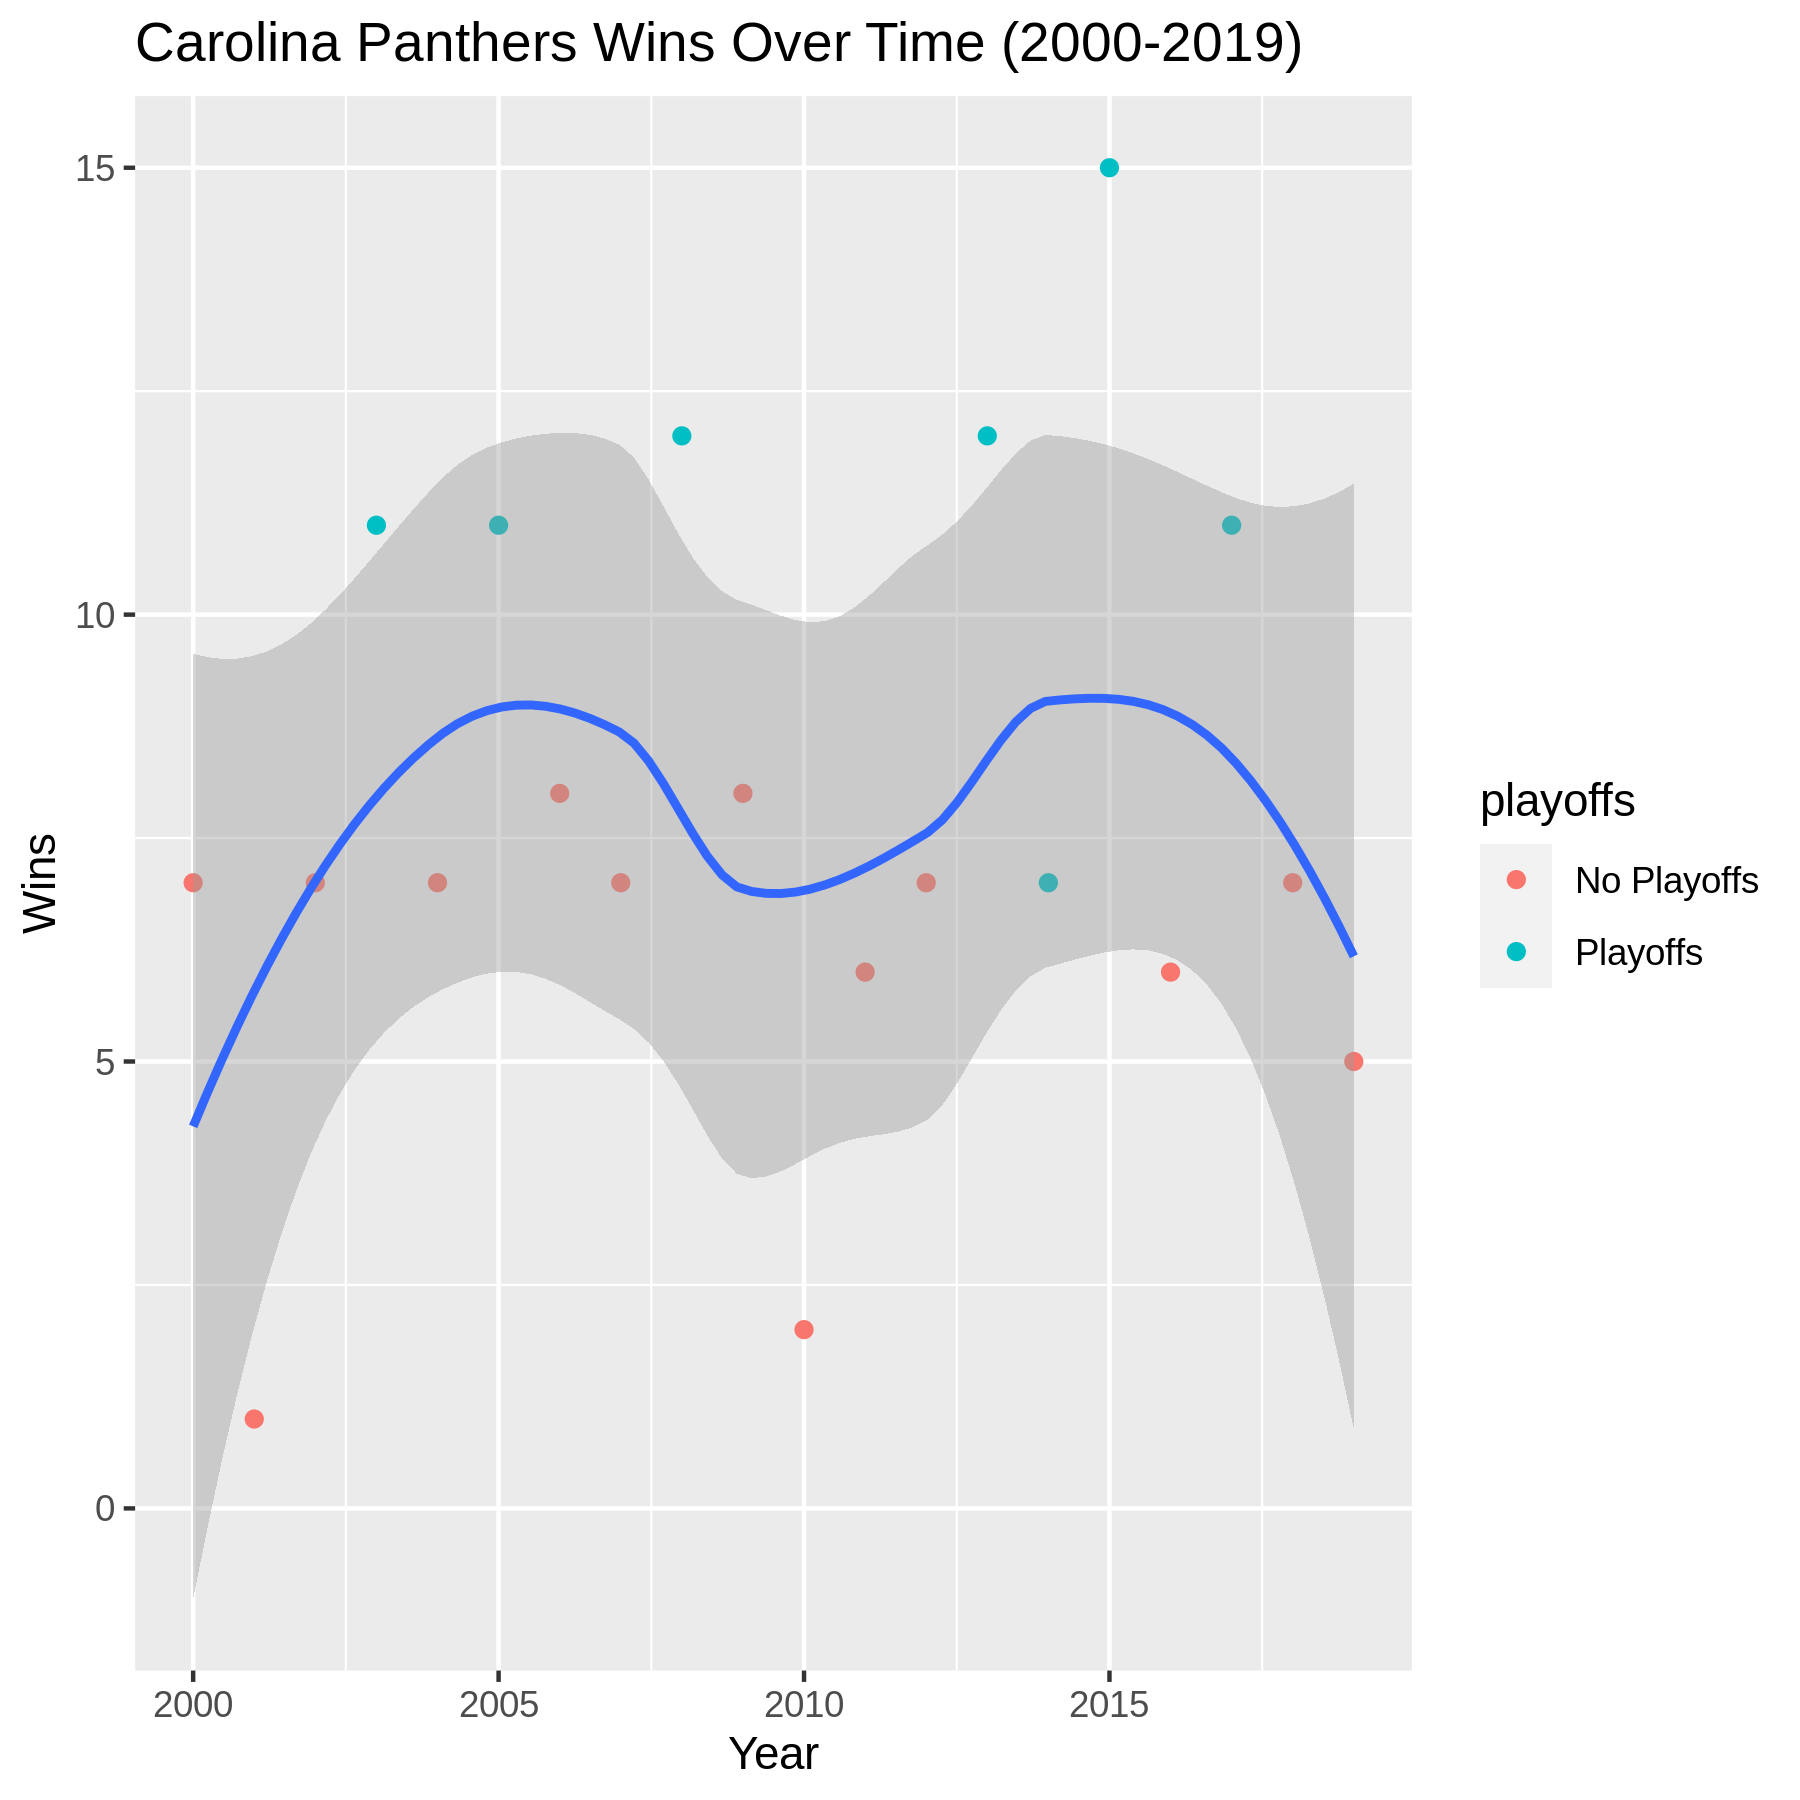

In [4]:
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 6)
p = ggplot(panthers, aes(x= year, y = wins)) + 
    geom_point(aes(color = playoffs)) + 
    geom_smooth() +
    labs(title = 'Carolina Panthers Wins Over Time (2000-2019)', x = 'Year', y= 'Wins') 

p

### Explanation:
This data is a collection of NFL results from 2000 to 2019 of various measures for all NFL teams. This dataset specifically contains measures such as wins, losses, strength of schedule (difficulty of respective team's schedule), whether a team makes the playoffs, and other measures for success. Usually in the NFL, sports platforms such as ESPN, NFL Network, and Pro Football Focus usually calculate a measure called strength of schedule (SOS) which determines the difficulty of a team's overall schedule and quality of opponent based on their opponent's roster composition, win-loss record from previous seasons, and other factors. A strength of schedule which is positive indicates a harder schedule and zero stregth of schedule indicates an average strength schedule. Usually SOS is used to predict the success of a team prior to starting the NFL season. I wanted to explore this relationship of SOS and wins while also adding a filter which identifies teams which made the playoffs. The data I used was from 2000 to 2019 and from all NFL teams during that period of time. Theoretically, teams with a lower SOS should have more wins due to the easier schedule compared to those with a higher SOS. However, upon analysis, there seems to be no trend or pattern which suggests teams with lower SOS are more successful. Also, as expected, teams with more wins tended to make the playoffs compared to those with less wins. 

The term "defense wins championships" has been a phrase used since the origin of football. But does a good defense in football really lead to success? I decided to explore this relationship using defensive rankings for all teams and sub-grouping it by the various teams that did and did not make the playoffs. Defensive rankings are the team's defense quality relative to average (0.0) and are determined by points allowed, sacks, interceptions, tackles for loss, and more. I decided to first subgroup teams who did and did not make the playoffs as comparison groups. I then used box plots to accurately assess the distribution of the defensive ranking by team and created forest plot-like diagram. The red line in the middle indicates an average NFL defense. When looking at the diagram, it is apparent that teams who made the playoffs had an above average to superb defensive ranking. Teams who did not make the playoffs have mostly had worse ranked defenses. Therefore, defenses can heavily attribute to playoff success. 

Finally, I have been a fan of the NFL for 23 years and I support the Carolina Panthers who are based out of Charlotte, NC. As a fan of the team presented with 20 years of NFL data, naturally I felt inclinded to track the overal success over the years. In the final data visualization, I wanted to simply plot the number of wins the Panthers have achieved by year and similar to the first graph I added a filter to observe if the Panthers went to the playoffs in the respective years. I also added a trendline using geom_smooth to show what the predicted wins would be by year so that I could observe if the Panthers over/underachieved every year. When observing the graph on point that sticks out to me is the 2015 season where the Panthers singificantly overachieved and made the playoffs. That was also the same year they made the Super Bowl. Another point which deserves to be recognized is the 2014 season where even though the Panthers underachieved based on the prediction, they still somehow made the playoffs. Other than that one outlier, there is a pattern that when the Panthers overachieved on wins, they tended to make the playoffs. When they underachieve on wins, they tend to miss the playoffs. 